In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
with open('delta.dat', 'r') as f:
     data = f.readlines()

In [3]:
lag = 0
delta = 0
plot_data = np.zeros((3, len(data)), dtype=int)
for i, line in enumerate(data):
    dvalues = line.split()
    if len(dvalues) > 2 and dvalues[0].isnumeric() == True:
        lag = dvalues[1].strip('+?').lstrip('?')
        delta = dvalues[2].strip('+').lstrip('?')
    plot_data[0][i] = i
    plot_data[1][i] = lag
    plot_data[2][i] = delta
        

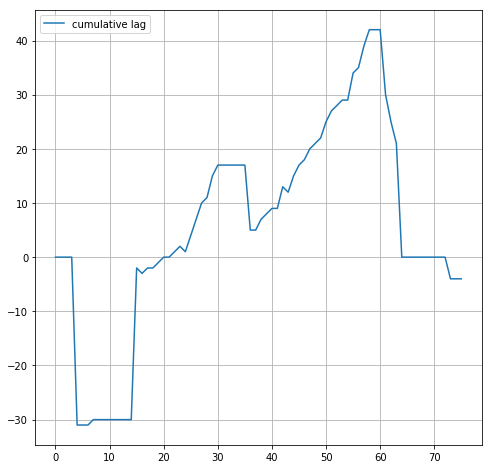

In [4]:
plt.rcParams['figure.figsize'] = [8, 8]
plt.plot(plot_data[0], plot_data[1], label='cumulative lag')
plt.legend()
plt.grid(True)
plt.show()

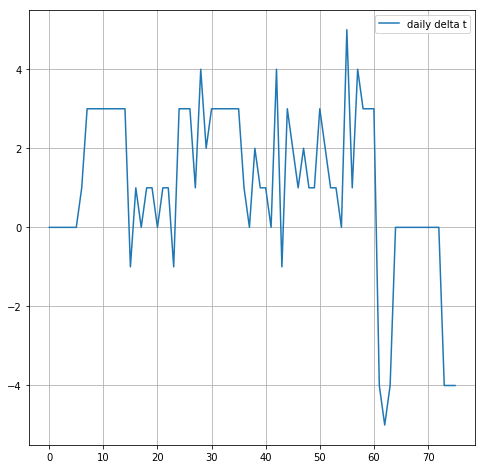

In [5]:
plt.rcParams['figure.figsize'] = [8, 8]
plt.plot(plot_data[0], plot_data[2], label='daily delta t')
plt.legend()
plt.grid(True)
plt.show()